# kMenasサンプル

- 参考：Python機械学習プログラミング
- https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

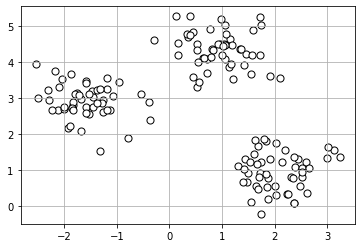

In [8]:
from sklearn.datasets import make_blobs  # ダミーデータの生成用

# Xには1つのプロットの(x,y)が、yにはそのプロットの所属するクラスター番号が入る
X,y=make_blobs(n_samples=150,         # サンプル点の総数
               n_features=2,          # 特徴量（次元数）の指定  default:2 
               centers=3,             # クラスタの個数
               cluster_std=0.5,       # クラスタ内の標準偏差 
               shuffle=True,          # サンプルをシャッフル
               random_state=0)        # 乱数生成器の状態を指定

plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolors='black',s=50)
plt.grid()
plt.show()

In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,            # クラスターの個数
            init='random',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
            max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
            tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
            random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態

y_km = km.fit_predict(X)

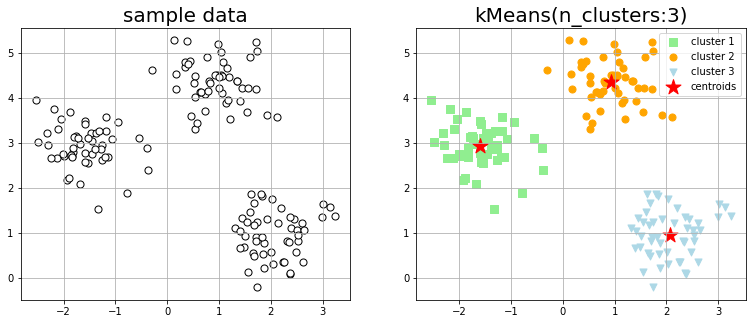

In [29]:
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plt.title('sample data', fontsize=20)
plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolors='black',s=50)
plt.grid()

plt.subplot(1, 2, 2)
plt.title('kMeans(n_clusters:3)', fontsize=20)
plt.scatter(X[y_km==0,0],         # y_km（クラスター番号）が0の時にXの0列目を抽出
                    X[y_km==0,1], # y_km（クラスター番号）が0の時にXの1列目を抽出
                    s=50,
                    c='lightgreen',
                    marker='s',
                    label='cluster 1')
plt.scatter(X[y_km==1,0],
                    X[y_km==1,1],
                    s=50,
                    c='orange',
                    marker='o',
                    label='cluster 2')
plt.scatter(X[y_km==2,0],
                   X[y_km==2,1],
                    s=50,
                    c='lightblue',
                    marker='v',
                    label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],   # km.cluster_centers_には各クラスターのセントロイドの座標が入っている
                    km.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
plt.legend()
plt.grid()
plt.show()

In [11]:
print ('Distortion: %.2f'% km.inertia_)

Distortion: 72.48


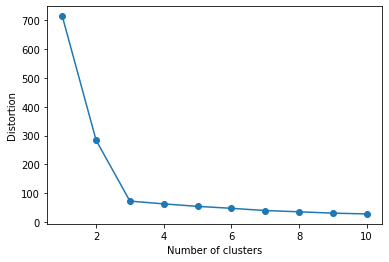

In [30]:
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [19]:
km3 = KMeans(n_clusters=3,            # クラスターの個数
            init='k-means++',        # セントロイドの初期値をランダムに設定
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansあるゴリmズムの実行回数
            max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態
y_km3 = km3.fit_predict(X)

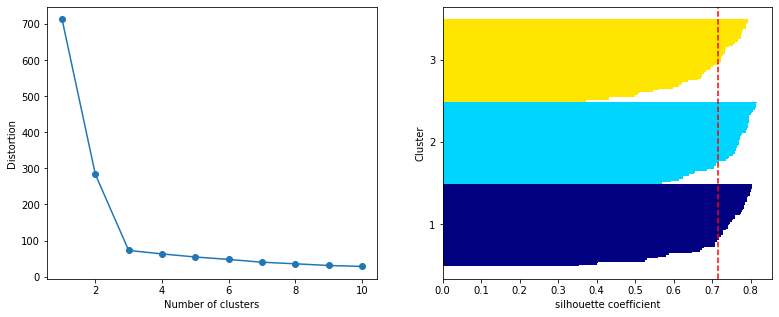

In [35]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

cluster_labels3 = np.unique(y_km3)       # y_kmの要素の中で重複を無くす
n_clusters3=cluster_labels3.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals3 = silhouette_samples(X,y_km3,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

plt.subplot(1, 2, 2)
for i,c in enumerate(cluster_labels3):
        c_silhouette_vals = silhouette_vals3[y_km3==c]      # cluster_labels3には 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters3)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals3)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels3 + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [34]:
km2 = KMeans(n_clusters=2,            # クラスターの個数
            init='k-means++',        # セントロイドの初期値をランダムに設定
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansあるゴリmズムの実行回数
            max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態
y_km2 = km2.fit_predict(X)

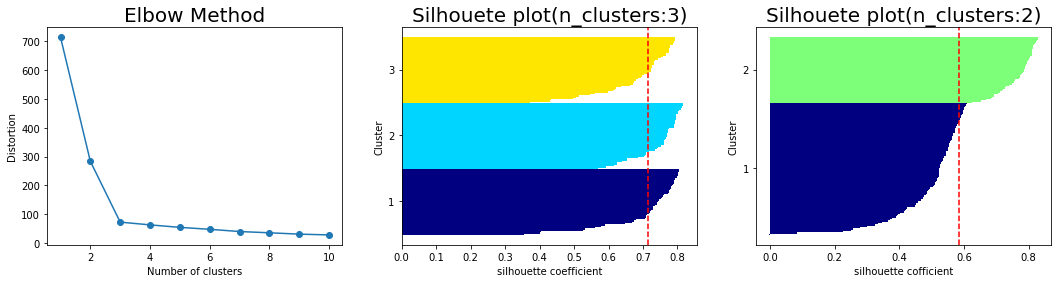

In [41]:
plt.figure(figsize=(18,4))

# エルボー法
plt.subplot(1, 3, 1)
plt.title('Elbow Method', fontsize=20)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

cluster_labels3 = np.unique(y_km3)       # y_kmの要素の中で重複を無くす
n_clusters3=cluster_labels3.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数3を計算
silhouette_vals3 = silhouette_samples(X,y_km3,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

plt.subplot(1, 3, 2)
plt.title('Silhouete plot(n_clusters:3)', fontsize=20)
for i,c in enumerate(cluster_labels3):
        c_silhouette_vals = silhouette_vals3[y_km3==c]      # cluster_labels3には 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters3)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals3)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels3 + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')

cluster_labels = np.unique(y_km2)       # y_km2の要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す

# シルエット係数2を計算
silhouette_vals = silhouette_samples(X,y_km2,metric='euclidean')
y_ax_lower, y_ax_upper= 0,0
yticks = []

plt.subplot(1, 3, 3)
plt.title('Silhouete plot(n_clusters:2)', fontsize=20)
for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km2==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i)/n_clusters)               # 色の値をセット
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅 
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの保油次位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette cofficient')
plt.show()